In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/My Drive/Colab Notebooks/"
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
seed_value=50
np.random.seed(seed_value)
random.seed(seed_value)

Mounted at /content/drive


Epsilon: 0.001, Accuracy: 19.3194
Epsilon: 0.01, Accuracy: 87.6275
Epsilon: 0.1, Accuracy: 95.9458
Epsilon: 1, Accuracy: 96.5844


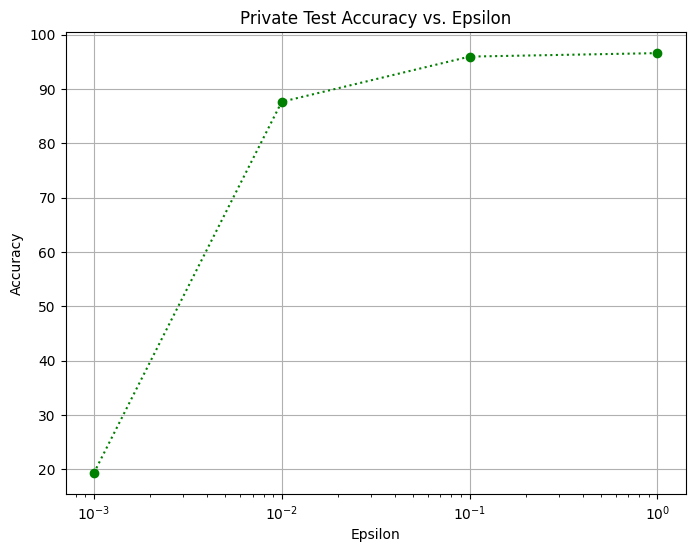

In [13]:
class LogisticRegressionWithL2Norm:
  @staticmethod
  def loss(theta,x,y,noise,lambda_param=None):
    n=x.shape[0]
    z=x.dot(theta.T)
    z=np.clip(z,-500,500)
    regularization=lambda_param/2*np.linalg.norm(theta,ord=2)**2
    objective_function=np.sum(np.log(1+np.exp(-y*z)))/n+regularization+np.dot(noise,theta)
    return objective_function

  @staticmethod
  def gradient(theta,x,y,noise,lambda_param=None):
    n=x.shape[0]
    z=x.dot(theta.T)
    z=np.clip(z,-500,500)
    regularization=lambda_param*theta
    grad=-(np.transpose(x)@(y/(1+np.exp(y*z))))/n+regularization+noise.T
    return grad

def predictLabels(paramTheta,paramX):
  predVals=np.sign(paramX.dot(paramTheta))
  predVals[predVals==0]=1
  return predVals

def trainLogisticRegression(paramX,paramY,lambdaParam,epsilonP):
  numSamples,numFeatures=paramX.shape
  initTheta=np.zeros(paramX.shape[1])
  paramC=1
  sensitivityVal=2
  epsilonPPrime=epsilonP-np.log(1+(2*paramC)/(numSamples*lambdaParam)+(paramC**2))/(numSamples**2*lambdaParam)
  if epsilonPPrime>0:
    deltaVal=0
  else:
    deltaVal=(paramC/(numSamples*(np.exp(epsilonPPrime/4)-1)))-lambdaParam
    epsilonPPrime=epsilonP/2
  stdDev=sensitivityVal/epsilonPPrime
  noiseVal=np.random.laplace(loc=0,scale=stdDev,size=numFeatures)
  result=minimize(fun=LogisticRegressionWithL2Norm.loss,x0=initTheta+noiseVal,args=(paramX,paramY,noiseVal,lambdaParam),jac=LogisticRegressionWithL2Norm.gradient,method='L-BFGS-B')
  return result.x+deltaVal/2*np.linalg.norm(initTheta,ord=2)**2

featData=np.load(data_path+"kddcup99_processed_x.npy",allow_pickle=True).astype(float)
labelData=np.load(data_path+"kddcup99_processed_y.npy",allow_pickle=True).astype(float)
labelData=(labelData>0).astype(int)*2-1
numSamples=featData.shape[0]
randIndices=np.random.permutation(numSamples)
featData=featData[randIndices]
labelData=labelData[randIndices]
numSamples=featData.shape[0]
trainSize=int(numSamples*(2/3))
trainFeat=featData[:trainSize]
trainLabels=labelData[:trainSize]
testFeat=featData[trainSize:]
testLabels=labelData[trainSize:]
lambdaParam=0.01
epsilonVals=[0.001,0.01,0.1,1]
privateTestAccuracies=[]
for epsilonVal in epsilonVals:
  trainedTheta=trainLogisticRegression(trainFeat,trainLabels,lambdaParam,epsilonVal)
  predLabels=predictLabels(trainedTheta,testFeat)
  accVal=np.mean(predLabels==testLabels)*100
  privateTestAccuracies.append(accVal)
  print(f"Epsilon: {epsilonVal}, Accuracy: {accVal:.4f}")
plt.figure(figsize=(8,6))
plt.plot(epsilonVals,privateTestAccuracies,marker='o',linestyle=':',color='g')
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Private Test Accuracy vs. Epsilon')
plt.grid(True)
plt.show()


<ipython-input-15-98311d93a31b>:5: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1 + np.exp(exponent))) / x.shape[0]
<ipython-input-15-98311d93a31b>:10: RuntimeWarning: overflow encountered in exp
  gradient_loss = - (np.transpose(x) @ (y / (1 + np.exp(exponent)))) / x.shape[0]


Epsilon: 0.001, Accuracy: 98.8557
Epsilon: 0.01, Accuracy: 98.9886
Epsilon: 0.1, Accuracy: 98.9929
Epsilon: 1, Accuracy: 95.6801


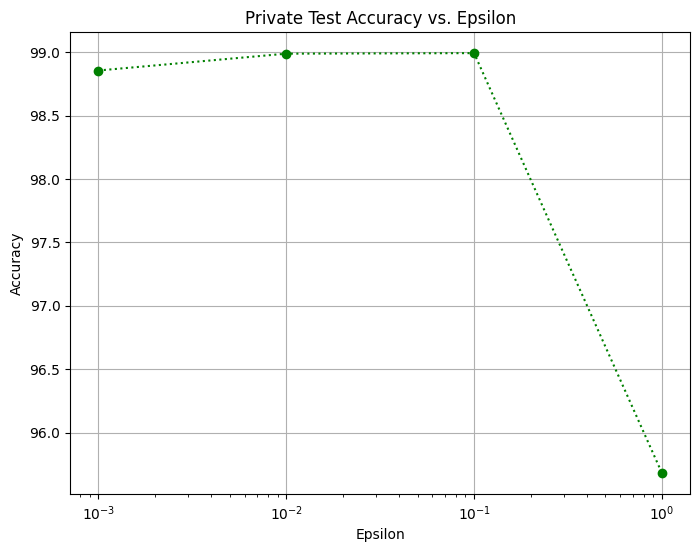

In [15]:
class LogisticRegression():
    @staticmethod
    def loss(theta, x, y, lambda_param=None):
        exponent = - y * (x.dot(theta))
        return np.sum(np.log(1 + np.exp(exponent))) / x.shape[0]

    @staticmethod
    def gradient(theta, x, y, lambda_param=None):
        exponent = y * (x.dot(theta))
        gradient_loss = - (np.transpose(x) @ (y / (1 + np.exp(exponent)))) / x.shape[0]
        gradient_loss = gradient_loss.reshape(theta.shape)
        return gradient_loss

def predictLabels(paramTheta,paramX):
  predVals=np.sign(paramX.dot(paramTheta))
  predVals[predVals==0]=1
  return predVals

def trainLogisticRegression(paramX,paramY,epsilonP):
  numSamples,numFeatures=paramX.shape
  initTheta=np.zeros(paramX.shape[1])
  paramC=1
  sensitivityVal=2
  epsilonPPrime=epsilonP-np.log(1+(2*paramC)/numSamples+(paramC**2))/numSamples**2
  if epsilonPPrime>0:
    deltaVal=0
  else:
    deltaVal=(paramC/(numSamples*(np.exp(epsilonPPrime/4)-1)))
    epsilonPPrime=epsilonP/2
  stdDev=sensitivityVal/epsilonPPrime
  noiseVal=np.random.laplace(loc=0,scale=stdDev,size=numFeatures)
  result=minimize(fun=LogisticRegression.loss,x0=initTheta+noiseVal,args=(paramX,paramY,noiseVal),jac=LogisticRegression.gradient,method='L-BFGS-B')
  return result.x+deltaVal/2*np.linalg.norm(initTheta,ord=2)**2

featData=np.load(data_path+"kddcup99_processed_x.npy",allow_pickle=True).astype(float)
labelData=np.load(data_path+"kddcup99_processed_y.npy",allow_pickle=True).astype(float)
labelData=(labelData>0).astype(int)*2-1
numSamples=featData.shape[0]
randIndices=np.random.permutation(numSamples)
featData=featData[randIndices]
labelData=labelData[randIndices]
numSamples=featData.shape[0]
trainSize=int(numSamples*(2/3))
trainFeat=featData[:trainSize]
trainLabels=labelData[:trainSize]
testFeat=featData[trainSize:]
testLabels=labelData[trainSize:]
epsilonVals=[0.001,0.01,0.1,1]
privateTestAccuracies=[]
for epsilonVal in epsilonVals:
  trainedTheta=trainLogisticRegression(trainFeat,trainLabels,epsilonVal)
  predLabels=predictLabels(trainedTheta,testFeat)
  accVal=np.mean(predLabels==testLabels)*100
  privateTestAccuracies.append(accVal)
  print(f"Epsilon: {epsilonVal}, Accuracy: {accVal:.4f}")
plt.figure(figsize=(8,6))
plt.plot(epsilonVals,privateTestAccuracies,marker='o',linestyle=':',color='g')
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Private Test Accuracy vs. Epsilon')
plt.grid(True)
plt.show()
